Week 4: Clustering 

Exercise 18

4.1 Represent 10-atom clusters: 

In this exercise you will work with some structures for 10-atomic Lennard-Jones clusters. You will be tasked with representing the atomic clusters with a 2-dimensional descriptor. This will allow you to plot the position of all atomic clusters in a descriptor space. You will see that something can be understood about the atomic clusters from their distribution in descriptor space.

4.2 The data

Here we are given some data of 40 10-atom clusters which we store in a file called "lj10clusters.txt".

4.3 Descriptor class

Load the 38 10 atomic clusters.

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# Load and reshape position data
pos_flat = np.loadtxt('lj10clusters.txt')
positions = pos_flat.reshape(-1, pos_flat.shape[1] // 2, 2)

Here we complete a descriptor class that implements distance moments representation.

In [124]:
class DistanceMoments:
    
    def __init__(self, color='C4'):
        self.xwidth = 1
        self.color = color
        self.bin_centers = range(2)
    
    # Calculate mean and standard deviation of pairwise distances
    def descriptor(self, pos):
        all_distances = pdist(pos)
        mean = np.mean(all_distances)
        std = np.std(all_distances)
        return np.array([mean, std])
    
    # Draw both the atom configuration and the bar plot of mean and std dev
    def draw(self, pos, ax, ax2):
        # Bar plot of mean and std dev
        vector = self.descriptor(pos)
        ax.bar(self.bin_centers, vector, width=0.8 * self.xwidth, color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([0, 2.3])
        
        xticklabels = ['mu', 'sigma']
        ax.set_xticks(range(len(xticklabels)))
        ax.set_xticklabels(xticklabels)
        ax.set_title(self.__class__.__name__)
        
        # Scatter plot of atom positions (atom configuration)
        ax2.scatter(pos[:, 0], pos[:, 1], color='blue', s=200, label="Atoms")
        ax2.set_title("Atom Configuration")
        ax2.set_xlabel("X")
        ax2.set_ylabel("Y")
        ax2.set_aspect('equal')
        ax2.grid(True)


4.4 Descriptor space

Plot the 38 clusters in (mu,sigma)-coordinate system.

/tmp/ipykernel_25037/2609624550.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


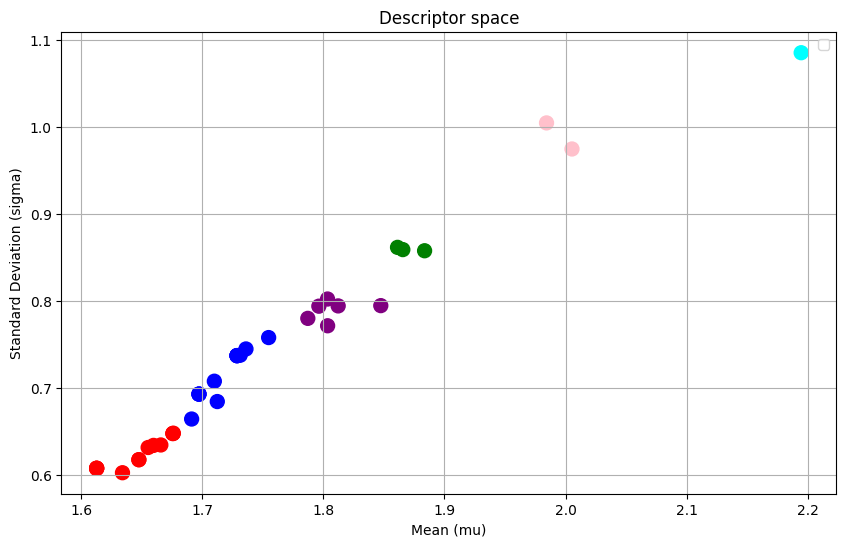

In [3]:
distance_moments = DistanceMoments()

mu_values = []
sigma_values = []
colors = []

color_range = [
    (1.6, 1.69, 'red'),
    (1.69,1.78, 'blue'),
    (1.78, 1.85, 'purple'),
    (1.85, 1.9, 'green'),
    (1.9, 2.1, 'pink'),
    (2.1, 1000, 'cyan')
]

def get_color(mu):
    for lower, upper, color in color_range:
        if lower <= mu < upper:
            return color
    return 'black'

# Loop through each cluster and compute mu and sigma
for pos in positions:
    mu, sigma = distance_moments.descriptor(pos)
    mu_values.append(mu)
    sigma_values.append(sigma)
    colors.append(get_color(mu))
# print(colors)

# Plot mu vs sigma
plt.figure(figsize=(10, 6))
plt.scatter(mu_values, sigma_values, color=colors, s=100)
plt.xlabel('Mean (mu)')
plt.ylabel('Standard Deviation (sigma)')
plt.title('Descriptor space')
plt.grid(True)
plt.legend()
plt.show()


4.5 Inspect atomic clusters

Sort the atomic clusters according to the group they belong to following your division in the previous stuff. 
Inspect atomic clusters in the same group. Perhaps by plotting them.

In [24]:
""" This is done in order to have the clusters in the next bit 
    be ordered by their color code the above. """

numbers = []
for i in range(len(colors)):
    numbers.append(i+1)
print(numbers)

# Sort pairs by the color
sorted_pairs = sorted(zip(colors, positions, numbers), key=lambda pair: pair[0])  # Use color as the key
sorted_colors, sorted_positions, sorted_numbers = zip(*sorted_pairs)  # Unzip the sorted pairs

# Convert back to lists if needed
sorted_colors = list(sorted_colors)
sorted_positions = list(sorted_positions)
sorted_numbers = list(sorted_numbers)

# Print results for verification
print("Sorted Colors:", sorted_colors)
print("Sorted Positions:", sorted_positions)
print(sorted_numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Sorted Colors: ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'cyan', 'green', 'green', 'green', 'pink', 'pink', 'purple', 'purple', 'purple', 'purple', 'purple', 'purple', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red']
Sorted Positions: [array([[ 0.      ,  0.      ],
       [ 0.825937,  0.555271],
       [ 1.563504,  2.115362],
       [-0.068715,  0.993453],
       [ 2.464694,  1.687123],
       [-0.895309,  0.438379],
       [-0.961979,  1.433116],
       [-0.135114,  1.989666],
       [ 0.752189,  1.547342],
       [ 1.648064,  1.116315]]), array([[ 0.      ,  0.      ],
       [-0.329527, -1.966106],
       [-1.098189, -1.331234],
       [-0.93415 , -0.347817],
       [-0.165895, -0.981661],
       [ 1.351292, -2.255604],
       [ 2.289408

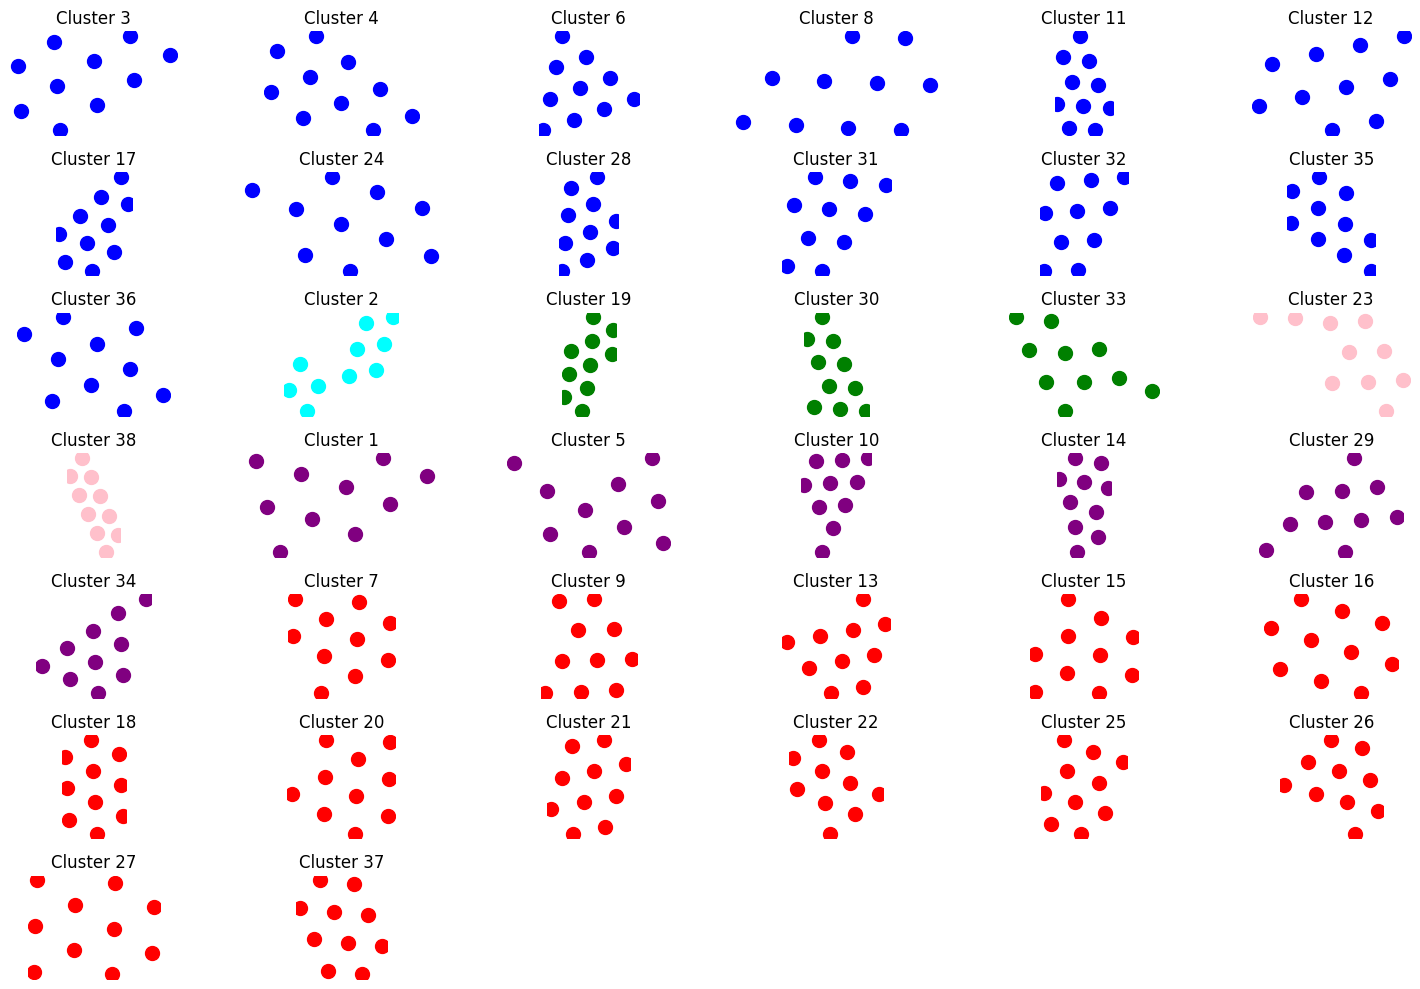

In [ ]:
n_clusters = len(positions)

n_cols = 6  
n_rows = (n_clusters + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

axes = axes.flatten()

for i, pos in enumerate(sorted_positions):
    ax = axes[i]
    ax.scatter(pos[:, 0], pos[:, 1], color=sorted_colors[i], s=100, label="Atoms")
    ax.set_title(f"Cluster {sorted_numbers[i]}") 
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_aspect('equal')
    ax.axis('off')

for ax in axes[n_clusters:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


Discuss whether I find the descriptor useful! 

It might be somewhat useful because I can see what shapes clusters with similar mu and sigma have, but is it limited by what was said in the theory on 2d Cartesian representations, or is this not relevant here?

Exercise 19

5.1 Extreme neighbor count

a) Complete a class called ExtremeNeighborCount that implements the extreme neighbor count representation. This is  2d representation of an atomic cluster via the lowest and highest coordination number experienced by any atom in the atomic cluster, [N_lowest, N_highest]. 

In [20]:
from scipy.spatial.distance import pdist,squareform

class ExtremeNeighborCount():
    
    def __init__(self, sigma, color='C5'):
        self.xwidth = 1
        self.color = color
        self.bin_centers = range(2)
        self.sigma = sigma
        
        #compute cutoff
        A = 1.2
        r_min = 2**(1/6)*sigma
        self.cutoff = A*r_min
    
    def descriptor(self,pos):
        distance_matrix = squareform(pdist(pos))
        connectivity_matrix = (distance_matrix < self.cutoff).astype(int) #entry 1 if atoms are within cutoff, else 0
        np.fill_diagonal( connectivity_matrix, 0 )
        neighbor_count = np.sum(connectivity_matrix, axis=1) #sum connectivity_matrix rows to get number of neighbours
        Nlowest = np.min(neighbor_count) #min number of neighbours
        Nhighest = np.max(neighbor_count) #max ...
        return np.array([Nlowest,Nhighest])

    def draw(self,pos,ax, ax2):
        vector = self.descriptor(pos)
        ax.bar(self.bin_centers,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([0,7])

        xticklabels = ['$N_{lowest}$','$N_{highest}$']
        ax.set_xticks(range(len(xticklabels)))
        ax.set_xticklabels(xticklabels)
        ax.set_title(self.__class__.__name__)

        # Scatter plot of atom positions (atom configuration)
        ax2.scatter(pos[:, 0], pos[:, 1], color='blue', s=200, label="Atoms")
        ax2.set_title("Atom Configuration")
        ax2.set_xlabel("X")
        ax2.set_ylabel("Y")
        ax2.set_aspect('equal')
        ax2.grid(True)

5.2 Histograms

b) Plot the descriptor for some 10-atomic LJ clusters.

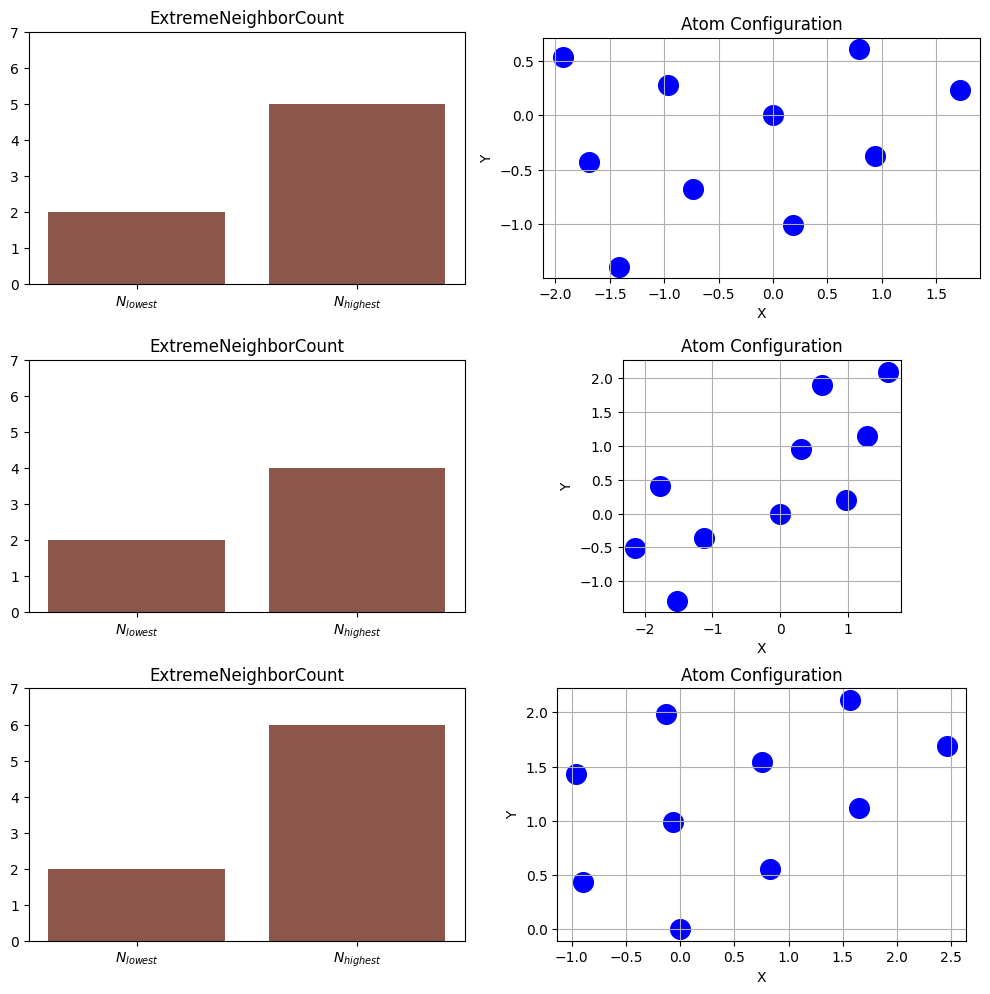

In [ ]:
distance_moments = DistanceMoments()
mu,sigma = distance_moments.descriptor(positions[0])
enc = ExtremeNeighborCount(sigma = sigma)
enc.descriptor(positions[0])

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

for i in range(3):
    ax_bar = axes[i, 0]  
    ax_scatter = axes[i, 1]  
    enc.draw(positions[i],ax_bar,ax_scatter)

plt.tight_layout()
plt.show() 


5.3 Descriptor space 

c) Place the descriptors in descriptor space and realize that there are only six different descriptors so that we naturally define six clusters.

[]
['green', 'purple', 'pink', 'pink', 'red', 'pink', 'pink', 'pink', 'pink', 'blue', 'pink', 'pink', 'pink', 'pink', 'pink', 'cyan', 'pink', 'cyan', 'green', 'pink', 'cyan', 'pink', 'red', 'blue', 'pink', 'pink', 'pink', 'pink', 'red', 'green', 'pink', 'pink', 'red', 'blue', 'pink', 'green', 'cyan', 'purple']


/tmp/ipykernel_25037/1972206222.py:45: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


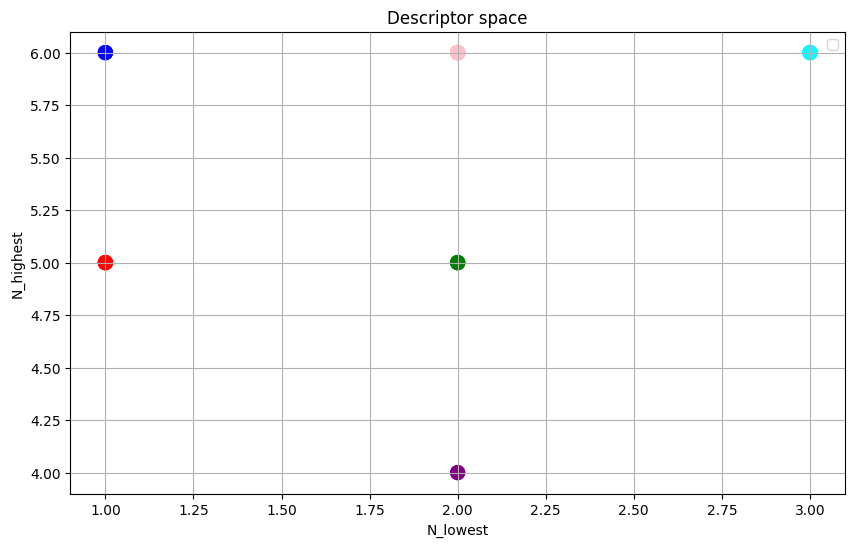

In [29]:
enc = ExtremeNeighborCount(sigma = sigma)

N_low_vals = []
N_high_vals = []
colors = []
mu_values = []

def get_color(lowest,highest):
    if lowest==1.00: 
        if highest==5.00:
            return 'red'
        else:
            return 'blue'
    elif lowest==2.00:
        if highest==4.00:
            return 'purple'
        elif highest==5.00:
            return 'green'
        else:
            return 'pink'
    else:
        return 'cyan'

print(colors)

# Loop through each cluster and compute mu and sigma
for pos in positions:
    mu, sigma = distance_moments.descriptor(pos)
    mu_values.append(mu)
    Nlow, Nhigh = enc.descriptor(pos)
    colors.append(get_color(Nlow,Nhigh))
    N_low_vals.append(Nlow)
    N_high_vals.append(Nhigh)
    mu = distance_moments.descriptor
    
print(colors)

# Plot low vs high
plt.figure(figsize=(10, 6))
plt.scatter(N_low_vals, N_high_vals, color=colors, s=100)
plt.xlabel('N_lowest')
plt.ylabel('N_highest')
plt.title('Descriptor space')
plt.grid(True)
plt.legend()
plt.show()


5.4 Inspect atomic clusters: like in exercise 18 we inspect atomic clusters that share descriptors by plotting them sorted and colored according to the clysters they belong to.

In [31]:
""" This is done in order to have the clusters in the next bit 
    be ordered by their color code the above. """

numbers = []
for i in range(len(colors)):
    numbers.append(i+1)
print(numbers)

# Sort pairs by the color
sorted_pairs = sorted(zip(colors, positions, numbers), key=lambda pair: pair[0])  # Use color as the key
sorted_colors, sorted_positions, sorted_numbers = zip(*sorted_pairs)  # Unzip the sorted pairs

# Convert back to lists if needed
sorted_colors = list(sorted_colors)
sorted_positions = list(sorted_positions)
sorted_numbers = list(sorted_numbers)

# Print results for verification
print("Sorted Colors:", sorted_colors)
print("Sorted Positions:", sorted_positions)
print(sorted_numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Sorted Colors: ['blue', 'blue', 'blue', 'cyan', 'cyan', 'cyan', 'cyan', 'green', 'green', 'green', 'green', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'purple', 'purple', 'red', 'red', 'red', 'red']
Sorted Positions: [array([[ 0.      ,  0.      ],
       [ 0.130795, -1.724604],
       [ 1.883554,  1.844408],
       [ 0.888534,  1.782526],
       [ 0.446662,  0.890686],
       [-0.548252,  0.830008],
       [ 1.440485,  0.951972],
       [ 0.997655,  0.064435],
       [-0.104205,  1.721547],
       [ 0.558013, -0.82552 ]]), array([[ 0.      ,  0.      ],
       [ 1.861627, -0.668032],
       [-0.198476,  0.974892],
       [ 0.194092, -0.981941],
       [-0.747748, -0.662027],
       [ 0.933801, -0.322889],
       [ 0.7484

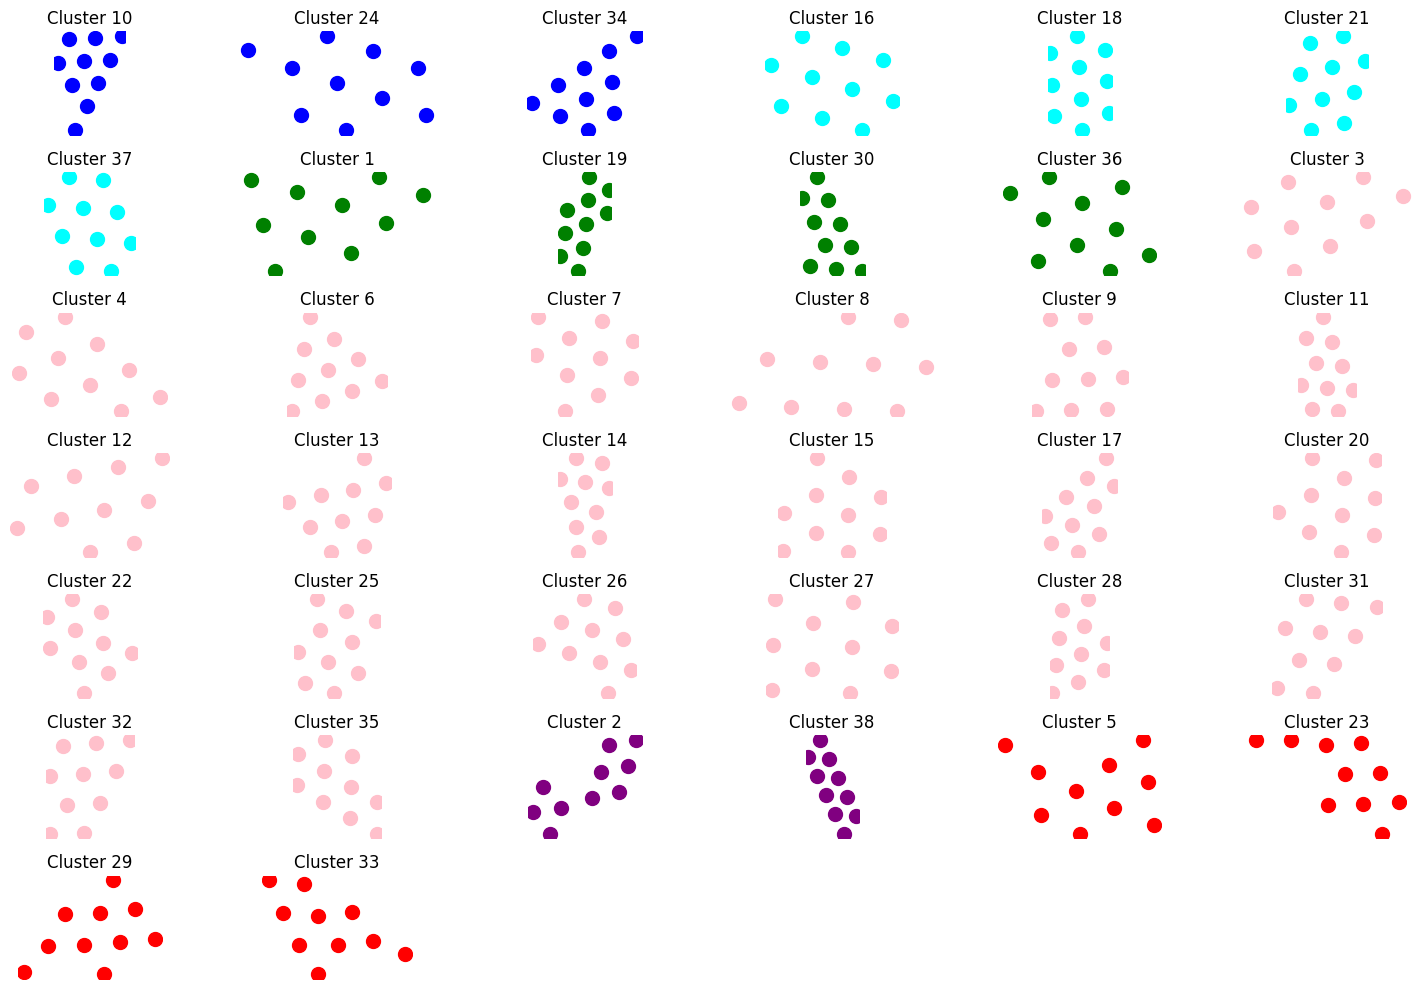

In [32]:
n_clusters = len(positions)

n_cols = 6  
n_rows = (n_clusters + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

axes = axes.flatten()

for i, pos in enumerate(sorted_positions):
    ax = axes[i]
    ax.scatter(pos[:, 0], pos[:, 1], color=sorted_colors[i], s=100, label="Atoms")
    ax.set_title(f"Cluster {sorted_numbers[i]}") 
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_aspect('equal')
    ax.axis('off')

for ax in axes[n_clusters:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


Ex 20

6.1 Multi-dimensional descriptors

In this exercise we shall work with the more rich multi-dimensional descriptors: The Interatomic Distance Distribution, the Coordination Number Profile, the Connectivity Graph Spectrum, and the Coulomb Matrix Spectrum (most important!) descriptors. Using some of the 10-atomic Lennard-Jones clusters that you worked with previously, you will be able to compare the descriptors.

6.2 Interatomic distance distribution

Implement the rest of a descriptor class.

the descriptor in each representation always throws away some information

In [33]:
#implementation of interatomic distance distribution
class PairDistances():
    
    def __init__(self, color='C1'):
        self.xwidth = 0.5
        self.color = color
        self.bin_edges = np.arange(0,7.01,self.xwidth)
        self.bin_centers = (self.bin_edges[:-1] + self.bin_edges[1:]) /2
    
    def descriptor(self,pos):
        pairwise_distances = pdist(pos)
        # print(pairwise_distances)
        hist, _ = np.histogram(pairwise_distances, bins=self.bin_edges)
        
        # pairwise_distances = []
        # for i in range 
        #     pairwise_distances_manual = np.sqrt((pos[1][0]-pos[0][0])**2+(pos[1][1]-pos[1][0])**2)
        # ...
        
        return hist
    
    def draw(self,pos,ax):
        vector = self.descriptor(pos)
        ax.bar(self.bin_centers,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_title(self.__class__.__name__)

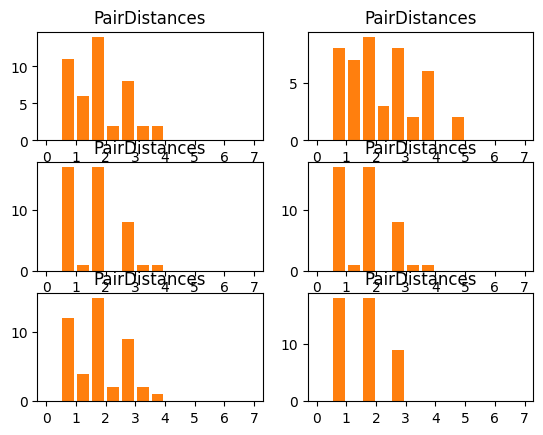

In [34]:
pair_distances = PairDistances()
fig, ax = plt.subplots(3,2)
ax_flat = ax.flatten()
for i in range(6):
    pair_distances.draw(positions[i], ax_flat[i])
plt.show()



6.3 Coordination Numer profile

The rest of a given class.

In [136]:
class CoordinationNumbers():
    
    def __init__(self,sigma, color='C2'):
        self.xwidth = 1
        self.color = color
        self.sigma = sigma
    
    def descriptor(self, sigma, pos):
        r_cut = 1.2 * 2**(1/6)*sigma # r_cut = A*r_min
        pairwise_distances_matrix = squareform(pdist(pos))
        coordination_numbers = np.sum((pairwise_distances_matrix < r_cut) & (pairwise_distances_matrix > 0), axis=1)
        hist, _ = np.histogram(coordination_numbers, bins=np.arange(9), range=(0, 8))
        return hist
    
    def draw(self,pos,ax):
        vector = self.descriptor(sigma, pos)
        N = len(vector)
        xcenters = np.linspace(0,N-1,N) * self.xwidth
        ax.bar(xcenters,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_title(self.__class__.__name__)

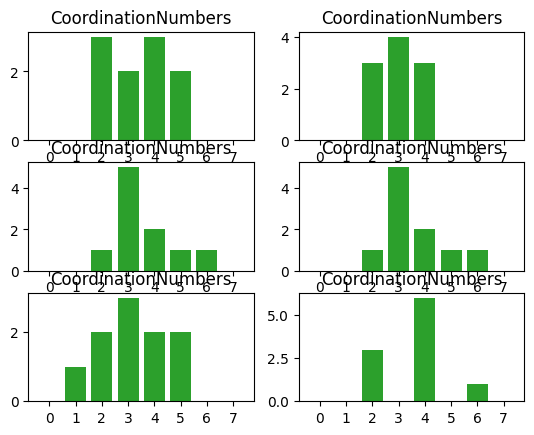

In [140]:
# Example of plotting
fig, ax = plt.subplots(3,2)
ax_flat = ax.flatten()
# sigma = 1.0  # Example value for sigma
sigma_values = []

for pos in positions:
    mu, sigma = distance_moments.descriptor(pos)
    sigma_values.append(sigma)


for i in range(6):
    coord_number = CoordinationNumbers(sigma_values[i])
    coord_number.draw(positions[i], ax_flat[i])  # Plot for the first cluster
plt.show()


6.4 Connectivity Graph Spectrum

The rest of a given class.

In [37]:
class ConnectivityGraphSpectrum():
    
    def __init__(self, color='C3'):
        self.xwidth = 1
        self.color = color
    
    def descriptor(self,pos):
        N = pos.shape[0]
        connectivity_matrix = np.zeros((N, N))
        r_cut = 1.2 * 2**(1/6)*sigma # r_cut = A*r_min
        # Fill the connectivity matrix
        for i in range(N):
            for j in range(N):
                # r_ij = distance between atoms i and j
                distance = np.linalg.norm(pos[i] - pos[j])
                if distance<r_cut:
                    connectivity_matrix[i, j] = 1.0
        
        # Compute eigenvalues of connectivity matrix
        eigenvalues = np.linalg.eigvalsh(connectivity_matrix)
        
        return np.sort(eigenvalues)
        
        
    
    def draw(self,pos,ax):
        vector = self.descriptor(pos)
        N = len(vector)
        xcenters = np.linspace(0,N-1,N) * self.xwidth
        ax.bar(xcenters,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_title(self.__class__.__name__)


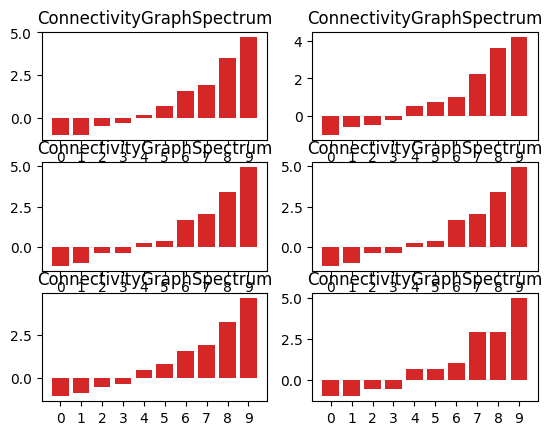

In [38]:

# Example usage
fig, ax = plt.subplots(3,2)
ax_flat = ax.flatten()

connectivity_graph_spectrum = ConnectivityGraphSpectrum()
for i in range(6):
    connectivity_graph_spectrum.draw(positions[i], ax_flat[i])

plt.show()



6.5 Coulomb Matrix Spectrum descriptors

Implemnt the rest of a given class called CoulombMatrixSpectrum

In [96]:
class CoulombMatrixSpectrum():
    
    def __init__(self, color='C4'):
        self.xwidth = 1
        self.color = color
        self.bin_centers = range(10)
    
    def descriptor(self,pos):
        N = pos.shape[0]
        coulomb_matrix = np.zeros((N, N))
        
        # Fill the Coulomb matrix
        for i in range(N):
            for j in range(N):
                if i == j:
                    coulomb_matrix[i, j] = 1.0  # Diagonal elements = 1
                else:
                    # Off-diagonal = 1 / r_ij 
                    # r_ij = distance between atoms i and j
                    distance = np.linalg.norm(pos[i] - pos[j])
                    coulomb_matrix[i, j] = 1.0 / distance
        
        # Compute eigenvalues of Coulomb matrix
        eigenvalues = np.linalg.eigvalsh(coulomb_matrix)
        
        return np.sort(eigenvalues)

    # def draw(self,pos,ax):
    #     vector = self.descriptor(pos)
    #     N = len(vector)
    #     xcenters = np.linspace(0,N-1,N) * self.xwidth
    #     ax.bar(xcenters,vector,width=0.8 * self.xwidth,color=self.color)
    #     ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
    #     ax.set_ylim([-2,8])
    #     ax.set_title(self.__class__.__name__)


    def draw(self,pos,ax, ax2):
        vector = self.descriptor(pos)
        ax.bar(self.bin_centers,vector,width=0.8 * self.xwidth,color=self.color)
        ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
        ax.set_ylim([0,7])

        xticklabels = ['0','1','2','3','4','5','6','7','8','9']
        ax.set_xticks(range(len(xticklabels)))
        ax.set_xticklabels(xticklabels)
        ax.set_title(self.__class__.__name__)

        # Scatter plot of atom positions (atom configuration)
        ax2.scatter(pos[:, 0], pos[:, 1], color='blue', s=200, label="Atoms")
        ax2.set_title("Atom Configuration")
        ax2.set_xlabel("X")
        ax2.set_ylabel("Y")
        ax2.set_aspect('equal')
        ax2.grid(True)

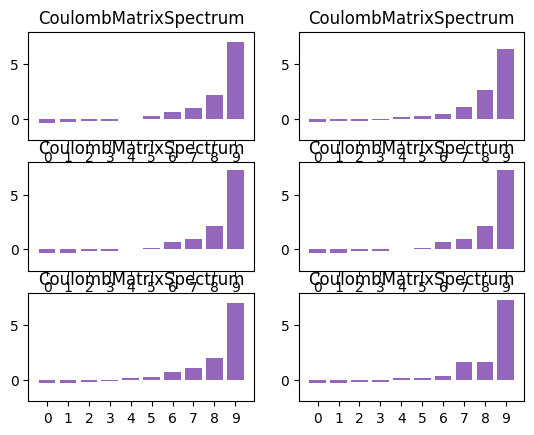

In [81]:

# Example usage
fig, ax = plt.subplots(3,2)
ax_flat = ax.flatten()

coulomb_matrix_spectrum = CoulombMatrixSpectrum()
for i in range(6):
    coulomb_matrix_spectrum.draw(positions[i], ax_flat[i])

plt.show()



Exercise 21

### 7.1 Principal Component Analysis

We shall be using a multi-dimensional descriptor and perform a dimensionality reduction in order to be able to visualize the descriptor-space.

We implement the PCA method by completing the following class (where only the skeleton is given):

In [49]:
class PCA():

    def __init__(self, X):
        self.X = X  #
        self.mu = np.mean(X, axis=0)  
        self.mu_T = self.mu.reshape(1, -1)  
        self.M = X.shape[0]  

    def mean_centering(self):
        # center the data by subtracting the mean of each variable
        one_M = np.ones((self.M, 1))  
        X_centered = self.X - one_M @ self.mu_T  
        return X_centered
    
    def covariance_matrix(self):
        # describes how the variables are correlated with each other
        X_centered = self.mean_centering()
        X_centered_T = X_centered.T
        C = 1/(self.M-1)*X_centered_T @ X_centered
        return C
    
    def eigval_decomp(self):
        C = self.covariance_matrix()
        eigenvalues, eigenvectors = np.linalg.eig(C)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        Lambda = np.diag(eigenvalues)
        return eigenvectors, Lambda
    
    def principal_components(self):
        X_centered = self.mean_centering()
        Q, _ = self.eigval_decomp(self)
        Z = X_centered @ Q
        return Z
    
    def dim_reduc(self, k):
        X_centered = self.mean_centering()
        Q, _ = self.eigval_decomp(self) 
        Q_k = Q[:, :k]
        Z_k = X_centered @ Q_k
        return Z_k
    
    def fit(self):
        # Compute mean-centered data
        self.X_centered = self.mean_centering()
        
        # Compute covariance matrix
        self.C = self.covariance_matrix()
        
        # Perform eigenvalue decomposition
        self.Q, self.Lambda = self.eigval_decomp()

    
    def transform(self, k):
        # Select the first k eigenvectors
        Q_k = self.Q[:, :k]
        
        # Project the mean-centered data onto the k principal components
        Z_k = self.X_centered @ Q_k
        return Z_k
    
    def inverse_transform(self, Z_k):
        # OPTIONALLY ADDED METHOD
        # Select the first k eigenvectors
        Q_k = self.Q[:, :Z_k.shape[1]]
        
        # Reconstruct the original data
        X_reconstructed = Z_k @ Q_k.T + self.mu
        return X_reconstructed



and then we test the PCA class on some given data:

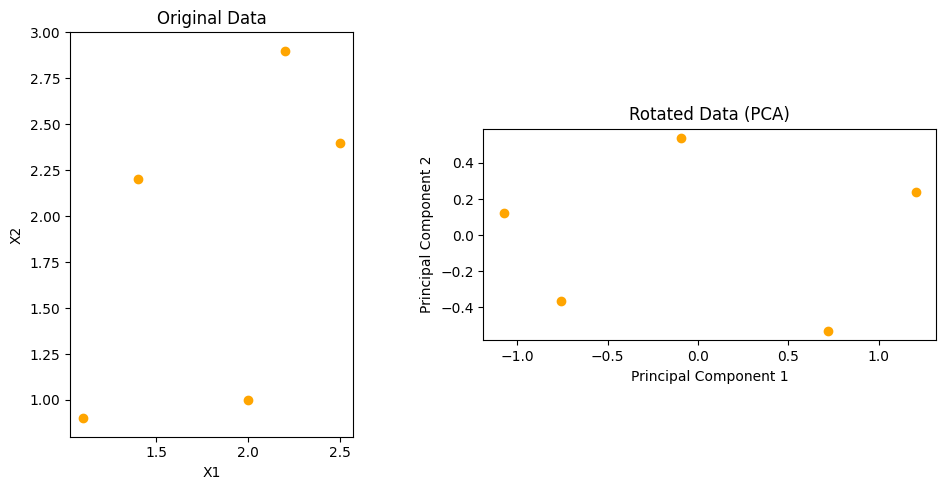

In [ ]:

X = np.array([
    [2.5, 2.4],
    [2.0, 1.0],
    [2.2, 2.9],
    [1.4, 2.2],
    [1.1, 0.9]
])

pca = PCA(X)
pca.fit()
X_rotated = pca.transform(k=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].scatter(X[:, 0], X[:, 1], color='orange')
axs[0].set_title("Original Data")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_aspect('equal')  # Ensure equal scaling of axes

axs[1].scatter(X_rotated[:, 0], X_rotated[:, 1], color='orange')
axs[1].set_title("Rotated Data (PCA)")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].set_aspect('equal')  

plt.tight_layout()
plt.show()


The effect of performing PCA on a 2D object is simply to rotate it. This can be used to rotate clusters.

Try doing some rotations for one of the 10-atomic LJ clusters
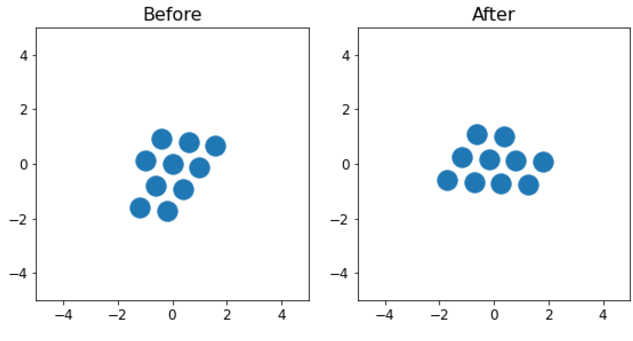

I.e. you use the Cartesian coords of the atomic cluster to define your principal directions, and you then make the transformation on the same coordinates.

[[ 0.        0.      ]
 [-1.418965 -1.390737]
 [-1.688972 -0.423876]
 [-0.733005 -0.67528 ]
 [-0.964995  0.283667]
 [ 0.184026 -1.00816 ]
 [ 0.93378  -0.372159]
 [ 1.720143  0.231825]
 [ 0.790685  0.610041]
 [-1.929761  0.539521]]


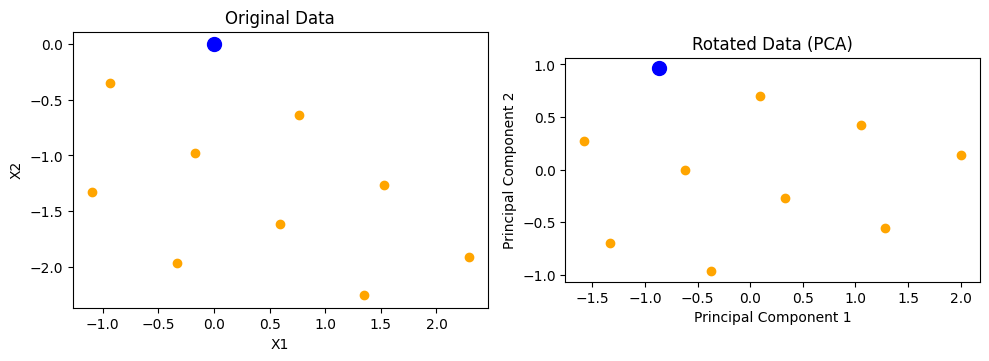

In [78]:
print(positions[0])


X = positions[3]

pca = PCA(X)
pca.fit()
X_rotated = pca.transform(k=2)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

tracked_index = 0

axs[0].scatter(X[:, 0], X[:, 1], color='orange')
axs[0].scatter(X[tracked_index, 0], X[tracked_index, 1], color='blue', s=100, label='Tracked Point')  # Highlight the tracked point
axs[0].set_title("Original Data")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2")
axs[0].set_aspect('equal')  # Ensure equal scaling of axes

axs[1].scatter(X_rotated[:, 0], X_rotated[:, 1], color='orange')
axs[1].scatter(X_rotated[tracked_index, 0], X_rotated[tracked_index, 1], color='blue', s=100, label='Tracked Point')  # Highlight the tracked point
axs[1].set_title("Rotated Data (PCA)")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")
axs[1].set_aspect('equal')  

plt.tight_layout()
plt.show()


### 7.2 Relaxed atomic clusters

consider again the 38 relaxed 10-atomic LJ clusters from previous exercises. Use the Coulomb Matrix Spectrum descriptor, CoulombMatrixSpectrum(), as their descriptor method. Plot the descriptor for some of them:
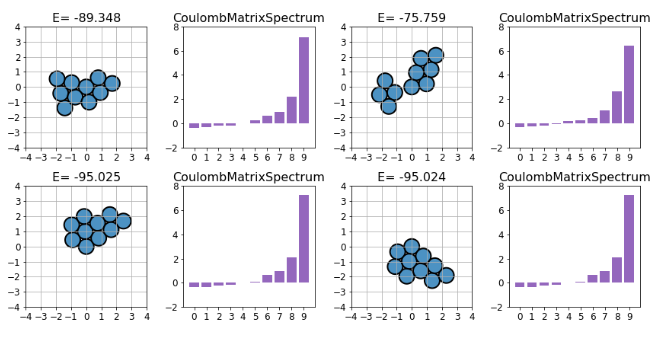

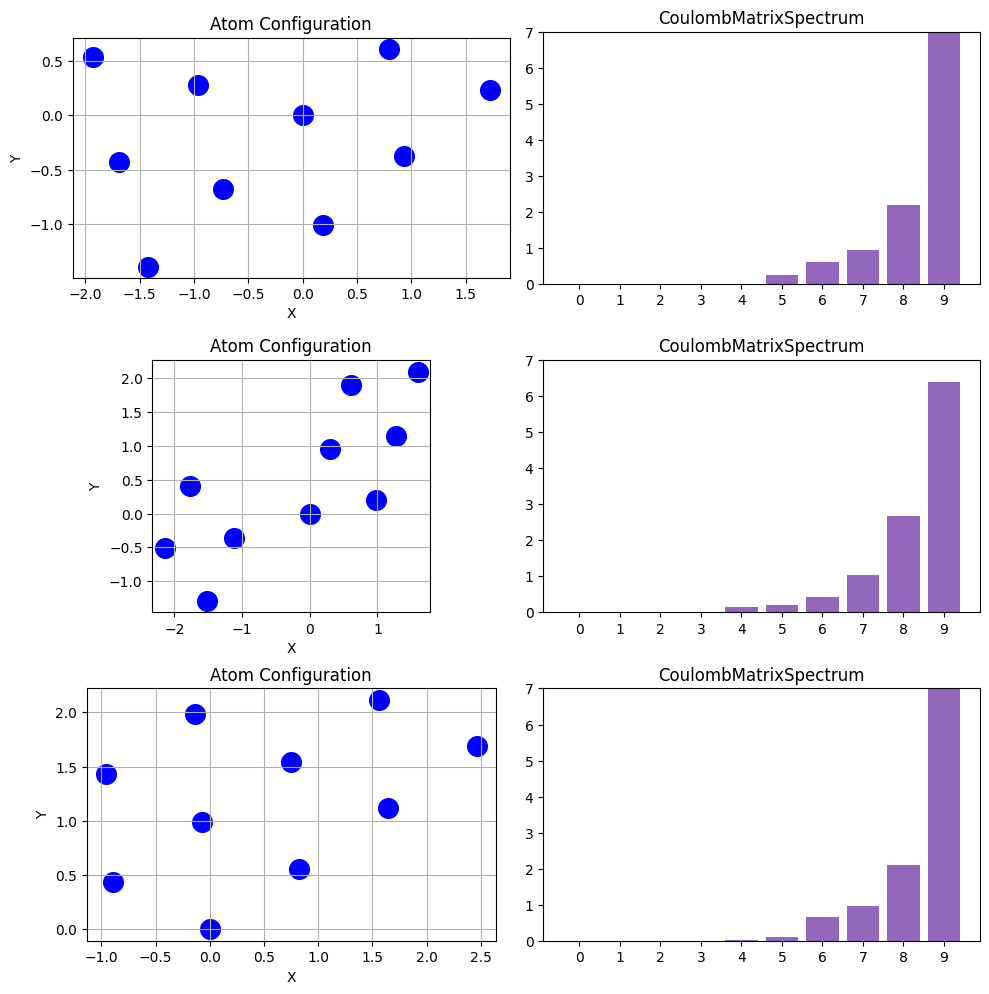

In [97]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
coulomb_matrix_spectrum = CoulombMatrixSpectrum()

for i in range(3):
    ax_scatter = axes[i,0]
    ax_bar = axes[i,1]
    coulomb_matrix_spectrum.draw(positions[i], ax_bar,ax_scatter)

plt.tight_layout()
plt.show()



e) Use your PCA implementation to plot the two-first PCA dimensions for these 38 atomic clusters using their descriptors (i.e. their cartesian coordinates as in question c). You should get this figure (left-hand image):

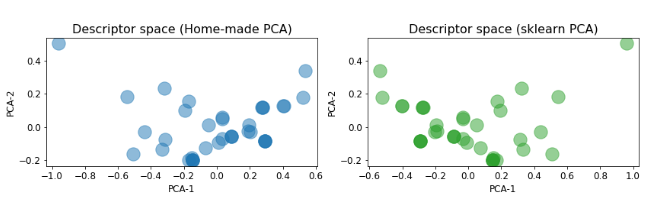

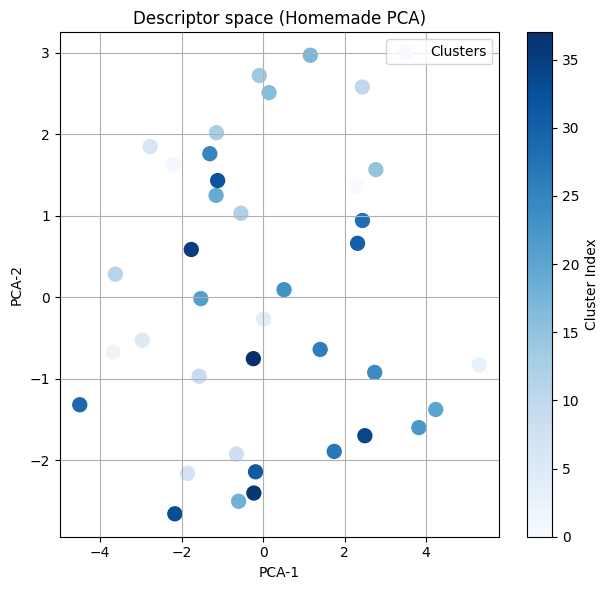

In [ ]:
# Step 1: Flatten each cluster into a 20-dimensional descriptor
descriptors = np.array([cluster.flatten() for cluster in positions])  # Shape: (38, 20)

# Step 2: Perform PCA using your custom PCA class
pca = PCA(descriptors)  # Initialize PCA with the descriptor matrix
pca.fit()  # Fit the PCA model
pca_result = pca.transform(k=2)  # Reduce to 2 dimensions (PCA1 and PCA2)

# Step 3: Extract PCA1 and PCA2 for plotting
PCA1 = pca_result[:, 0]
PCA2 = pca_result[:, 1]

# Step 4: Plot the descriptor space using homemade PCA
plt.figure(figsize=(12, 6))

# Left-hand plot: Homemade PCA
plt.subplot(1, 2, 1)
plt.scatter(PCA1, PCA2, s=100, c=np.arange(len(PCA1)), cmap='Blues', label='Clusters')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('Descriptor space (Homemade PCA)')
plt.grid(True)
plt.colorbar(label="Cluster Index")
plt.legend()

plt.tight_layout()
plt.show()


### 7.3 Rattled atomic clusters

g) Take one or several of the 38 relaxed 10-atomic Lennard-Jones clusters. Add random noise to their coordinates. Use a small amplitude, so they still "look like themselves", but have their descriptors changed. Here are one relaxed structure and 3 rattled copies of it:
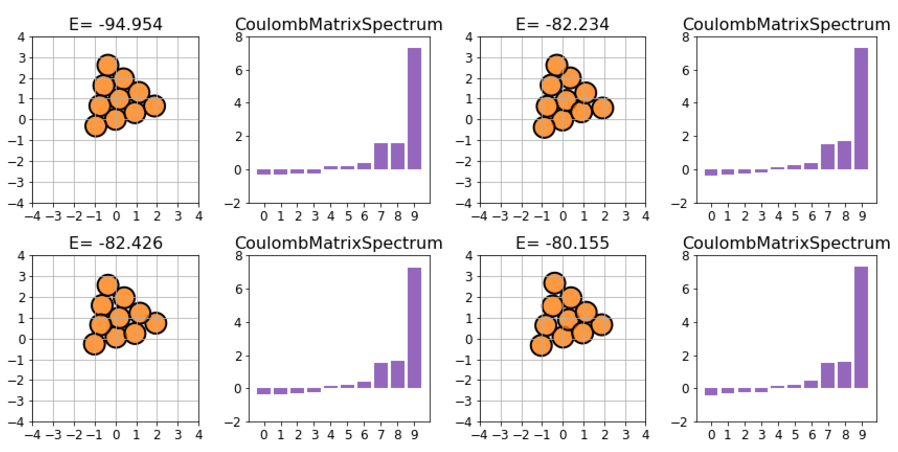

In [152]:
noise_scale = 0.05

noisy_clusters = positions + noise_scale * np.random.randn(*positions.shape)

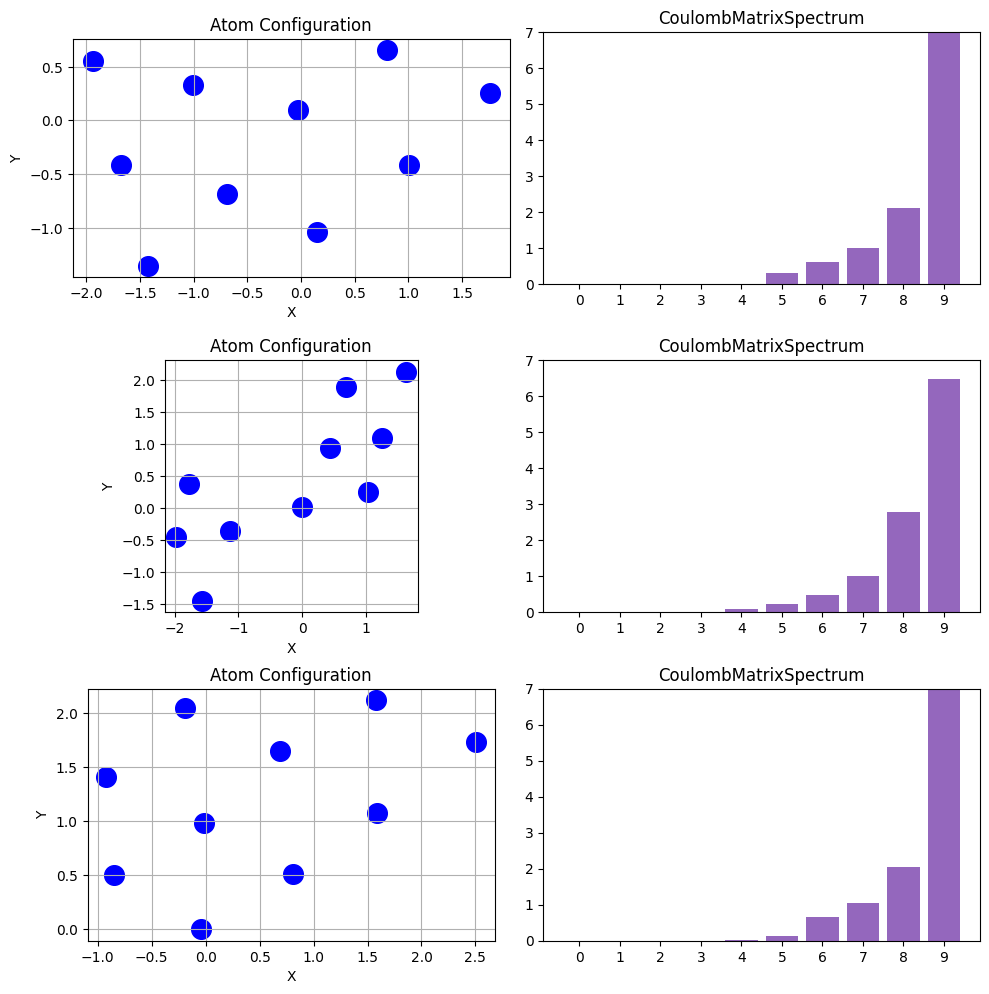

In [153]:
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
coulomb_matrix_spectrum = CoulombMatrixSpectrum()

for i in range(3):
    ax_scatter = axes[i,0]
    ax_bar = axes[i,1]
    coulomb_matrix_spectrum.draw(noisy_clusters[i], ax_bar,ax_scatter)

plt.tight_layout()
plt.show()



Notice how the small noise on the atoms is barely visible in the descriptor.

e) Insert the rattled clusters in the PCA plot. Repeat for several atomic clusters: